In [4]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("/content/data_clima_numerico_limpia.csv")
data.head()

,Unnamed: 0,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion,temperatura
0,0,0.92,11.27,130.0,8.05,1021.60,no,Cold,-0.56
1,1,0.73,20.93,330.0,16.10,1017.00,si,Warm,21.11
2,2,0.97,5.97,193.0,14.91,1013.99,si,Normal,16.60
3,3,0.82,3.22,300.0,16.10,1031.59,si,Cold,1.60
4,4,0.60,10.88,116.0,9.98,1020.88,si,Cold,2.19


In [ ]:
data.corr()

,Unnamed: 0,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,temperatura,lluvia_binarizada,descripcion_Normal,descripcion_Warm
Unnamed: 0,1.000000,0.005234,-0.012047,-0.012130,-0.003734,0.005619,-0.006425,-0.004198,-0.007086,-0.004813
humedad,0.005234,1.000000,-0.222410,-0.007605,-0.375690,0.041448,-0.629062,-0.224919,0.210393,-0.595640
velocidad_viento_kmh,-0.012047,-0.222410,1.000000,0.108464,0.100416,-0.267220,0.009777,0.067215,0.033914,-0.003859
rumbo_viento_grados,-0.012130,-0.007605,0.108464,1.000000,0.052094,-0.074018,0.030920,0.048478,0.032517,0.000606
visibilidad_km,-0.003734,-0.375690,0.100416,0.052094,1.000000,-0.147526,0.389360,0.302047,0.131776,0.218883
presion_mbar,0.005619,0.041448,-0.267220,-0.074018,-0.147526,1.000000,-0.306694,-0.290728,-0.126285,-0.157642
temperatura,-0.006425,-0.629062,0.009777,0.030920,0.389360,-0.306694,1.000000,0.557887,-0.026249,0.755699
lluvia_binarizada,-0.004198,-0.224919,0.067215,0.048478,0.302047,-0.290728,0.557887,1.000000,0.348953,0.202162
descripcion_Normal,-0.007086,0.210393,0.033914,0.032517,0.131776,-0.126285,-0.026249,0.348953,1.000000,-0.577600
descripcion_Warm,-0.004813,-0.595640,-0.003859,0.000606,0.218883,-0.157642,0.755699,0.202162,-0.577600,1.000000


In [ ]:
data_seleccionada = data[['temperatura','humedad']]

data_seleccionada.head(20)

,temperatura,humedad
0,-0.56,0.92
1,21.11,0.73
2,16.60,0.97
3,1.60,0.82
4,2.19,0.60
5,27.54,0.32
6,19.98,0.84
7,11.11,0.86
8,8.41,0.73
9,1.70,0.81


In [ ]:
X = data['humedad']
y = data['temperatura']

In [ ]:
import seaborn as sns

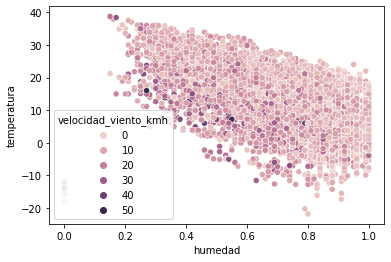

In [5]:
sns.scatterplot(data = data, x='humedad', y='temperatura', hue='velocidad_viento_kmh')

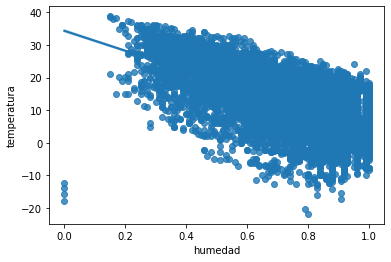

In [ ]:
sns.regplot(data=data, x='humedad', y='temperatura')

In [ ]:
# Queremos entrenar un modelo lineal que me prediga con la humedad, cual es la teperatura esperada
# Para poder testear que el modelo aprenda razonablemente bien vamos a guardarnos algunos datos de prueba

# Vamos a importar una funcion que me separa los datos en test y entrenamiento

from sklearn.model_selection import train_test_split

# Vamos a aplicarlo

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=24)

# Ya tenemos separados los datos


In [ ]:
y_test

5252     0.81
255     16.67
5348    12.06
7823    11.09
4848     9.39
        ...  
3146    17.28
9357     3.84
4943     1.13
9400     9.50
2165     1.02
Name: temperatura, Length: 2497, dtype: float64

In [ ]:
# Detalle tecnico, por como vienen los datos que es solo una columna tenemos que hacer una cosa que lecambia la forma

import numpy as np

x_train_m =x_train.to_numpy()

x_train_m = np.matrix(x_train_m.reshape(len(x_train_m),1))

x_test_m =x_test.to_numpy()
x_test_m = np.matrix(x_test_m.reshape(len(x_test_m),1))

In [ ]:
# Ahora queremos elegir que tipo de modelo queremos para describir los datos
# Vamos elegir un modelo lineal simple, osea una recta que dependa solo de una de las columnas
# Lo que el modelo tiene que elegir cuando entrena, es cual es la oredenada al origen y la pendiente que mejor permite predecir satos nuevos

from sklearn.linear_model import LinearRegression

modelo = LinearRegression(fit_intercept=False)

modelo.fit(x_train_m,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LinearRegression(fit_intercept=False)

In [ ]:
print (modelo.coef_)
modelo.intercept_

[12.94992676]


0.0

In [ ]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


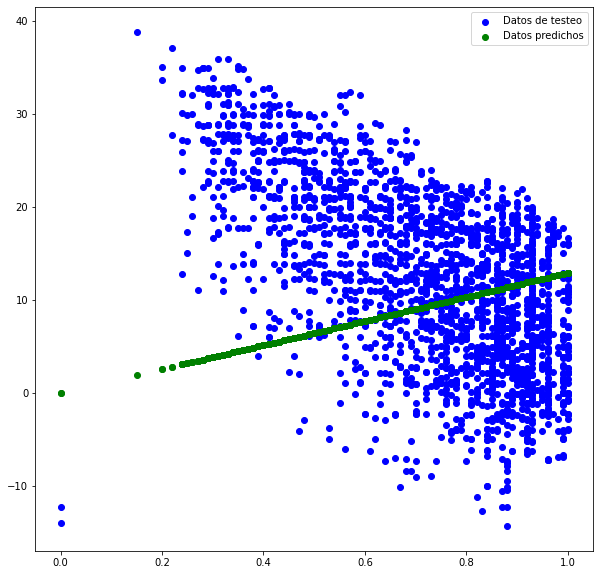

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(x_test, y_test, color = 'b', label = 'Datos de testeo')
y_pred = modelo.predict(x_test_m)
plt.scatter(x_test, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

-0.4850376938727854